# Files & imports

In [5]:
#from pandas import read_csv, DataFrame
import pandas as pd

## https://www.kaggle.com/datasets/mkechinov/direct-messaging/data #

filename = "messages-demo.csv"
file_tag = "ecom_msg"
#data: DataFrame = read_csv(filename, na_values="")#

#data.shape#

#data.info()

In [6]:
%run "dslabs_functions.py"

# Load test data

In [ ]:
test_data=True
# test_data=False

if test_data==True:
    # Specify the chunk size (e.g., load 1000 lines at a time)
    chunk_size = 50000

    # Initialize an empty list to store the chunks
    chunks = []

    # Load the first chunk (or any number of chunks you want)
    for chunk in pd.read_csv(filename, chunksize=chunk_size):
        chunks.append(chunk)
        # Break after the first chunk to load only a sample
        break

    # Concatenate the chunks into a single DataFrame (optional)
    data = pd.concat(chunks)

else:
    data=pd.read_csv(filename)


data

,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


# Dimensionality

Understand the ratio between the number of records and variables

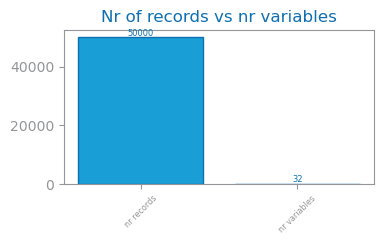

In [8]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
#savefig(f"./{file_tag}_records_variables.png") #save for later step
show()

## Missing values

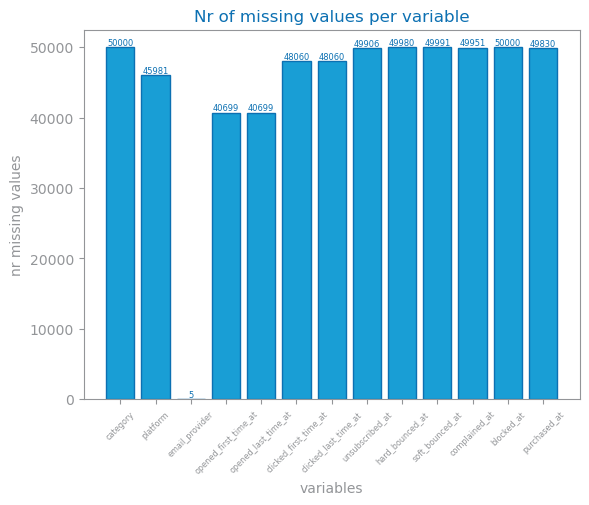

In [9]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"./{file_tag}_mv.png")
show()

## Variables types

In [10]:
data.dtypes

id                         int64
message_id                object
campaign_id                int64
message_type              object
client_id                  int64
channel                   object
category                 float64
platform                  object
email_provider            object
stream                    object
date                      object
sent_at                   object
is_opened                 object
opened_first_time_at      object
opened_last_time_at       object
is_clicked                object
clicked_first_time_at     object
clicked_last_time_at      object
is_unsubscribed           object
unsubscribed_at           object
is_hard_bounced           object
hard_bounced_at           object
is_soft_bounced           object
soft_bounced_at           object
is_complained             object
complained_at             object
is_blocked                object
blocked_at               float64
is_purchased              object
purchased_at              object
created_at

In [11]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types

{'numeric': ['id', 'campaign_id', 'client_id', 'category', 'blocked_at'], 'binary': ['is_opened', 'is_clicked', 'is_unsubscribed', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased'], 'date': ['date', 'sent_at', 'opened_first_time_at', 'opened_last_time_at', 'clicked_first_time_at', 'clicked_last_time_at', 'unsubscribed_at', 'hard_bounced_at', 'soft_bounced_at', 'complained_at', 'purchased_at', 'created_at', 'updated_at'], 'symbolic': ['message_id', 'message_type', 'channel', 'platform', 'email_provider', 'stream', 'is_blocked']}


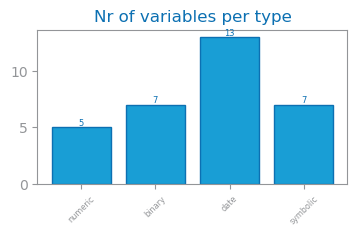

In [12]:
variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
#savefig(f"./{file_tag}_variable_types.png")
show()

In [13]:
symbolic: list[str] = variable_types["symbolic"]
data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
data.dtypes

id                                int64
message_id                     category
campaign_id                       int64
message_type                   category
client_id                         int64
channel                        category
category                        float64
platform                       category
email_provider                 category
stream                         category
date                     datetime64[ns]
sent_at                  datetime64[ns]
is_opened                        object
opened_first_time_at     datetime64[ns]
opened_last_time_at      datetime64[ns]
is_clicked                       object
clicked_first_time_at    datetime64[ns]
clicked_last_time_at     datetime64[ns]
is_unsubscribed                  object
unsubscribed_at          datetime64[ns]
is_hard_bounced                  object
hard_bounced_at          datetime64[ns]
is_soft_bounced                  object
soft_bounced_at          datetime64[ns]
is_complained                    object


# Distribution

In [14]:
summary5: DataFrame = data.describe(include="all")
summary5

,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
count,5.000000e+04,50000,50000.000000,50000,5.000000e+04,50000,0.0,4019,49995,50000,...,50000,9,50000,49,50000,0.0,50000,170,50000,50000
unique,NaN,50000,NaN,3,NaN,3,NaN,4,56,1,...,2,NaN,2,NaN,1,NaN,2,NaN,NaN,NaN
top,NaN,00016135-869f-48cb-a52c-14955eba0127,NaN,trigger,NaN,email,NaN,desktop,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,NaN,NaN
freq,NaN,1,NaN,36907,NaN,49993,NaN,2695,26165,50000,...,49991,NaN,49951,NaN,50000,NaN,49830,NaN,NaN,NaN
mean,1.423367e+07,NaN,13391.227600,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30 22:10:51.777777920,NaN,2021-05-17 03:24:36.918367232,NaN,NaN,NaN,2021-05-02 11:11:46.588235264,2023-04-27 16:26:30.635215872,2023-04-27 16:26:52.978756864
min,3.520546e+06,NaN,26.000000,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30 16:25:17,NaN,2021-04-30 05:40:05,NaN,NaN,NaN,2021-04-30 02:37:50,2023-04-27 08:54:55.976684,2023-04-27 08:54:55.977487
25%,3.534241e+06,NaN,179.000000,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30 17:26:00,NaN,2021-04-30 16:00:06,NaN,NaN,NaN,2021-04-30 10:09:01.500000,2023-04-27 08:55:16.033223424,2023-04-27 08:55:59.675018240
50%,1.801921e+07,NaN,18011.000000,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30 22:25:06,NaN,2021-05-03 11:00:06,NaN,NaN,NaN,2021-04-30 15:37:24,2023-04-27 19:06:12.950772736,2023-04-27 19:06:13.683147520
75%,1.803234e+07,NaN,18212.000000,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30 22:50:04,NaN,2021-05-12 21:00:07,NaN,NaN,NaN,2021-05-01 08:50:18.249999872,2023-04-27 19:06:31.980299776,2023-04-27 19:06:33.340220160
max,5.499801e+07,NaN,19017.000000,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-05-01 06:25:10,NaN,2021-09-23 02:00:05,NaN,NaN,NaN,2021-09-12 04:11:05,2023-04-29 02:44:16.005064,2023-04-29 02:44:16.005879


Numerical variables:

In [15]:
#Use a variable from the dataset - Note: i dont have numeric variables in my dataset 
# var: str = "-"
# print(f"Summary for {var} variable:")
# print("\tCount: ", summary5[var]["count"])
# print("\tMean: ", summary5[var]["mean"])
# print("\tStDev: ", summary5[var]["std"])
# print("\tMin: ", summary5[var]["min"])
# print("\tQ1: ", summary5[var]["25%"])
# print("\tMedian: ", summary5[var]["50%"])
# print("\tQ3: ", summary5[var]["75%"])
# print("\tMax: ", summary5[var]["max"])

Non-numerical variables:

In [16]:
var = "email_provider"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tUnique: ", summary5[var]["unique"])
print("\tTop: ", summary5[var]["top"])
print("\tFreq: ", summary5[var]["freq"])

Summary for email_provider variable:
	Count:  49995
	Unique:  56
	Top:  mail.ru
	Freq:  26165


## Symbolic Variables

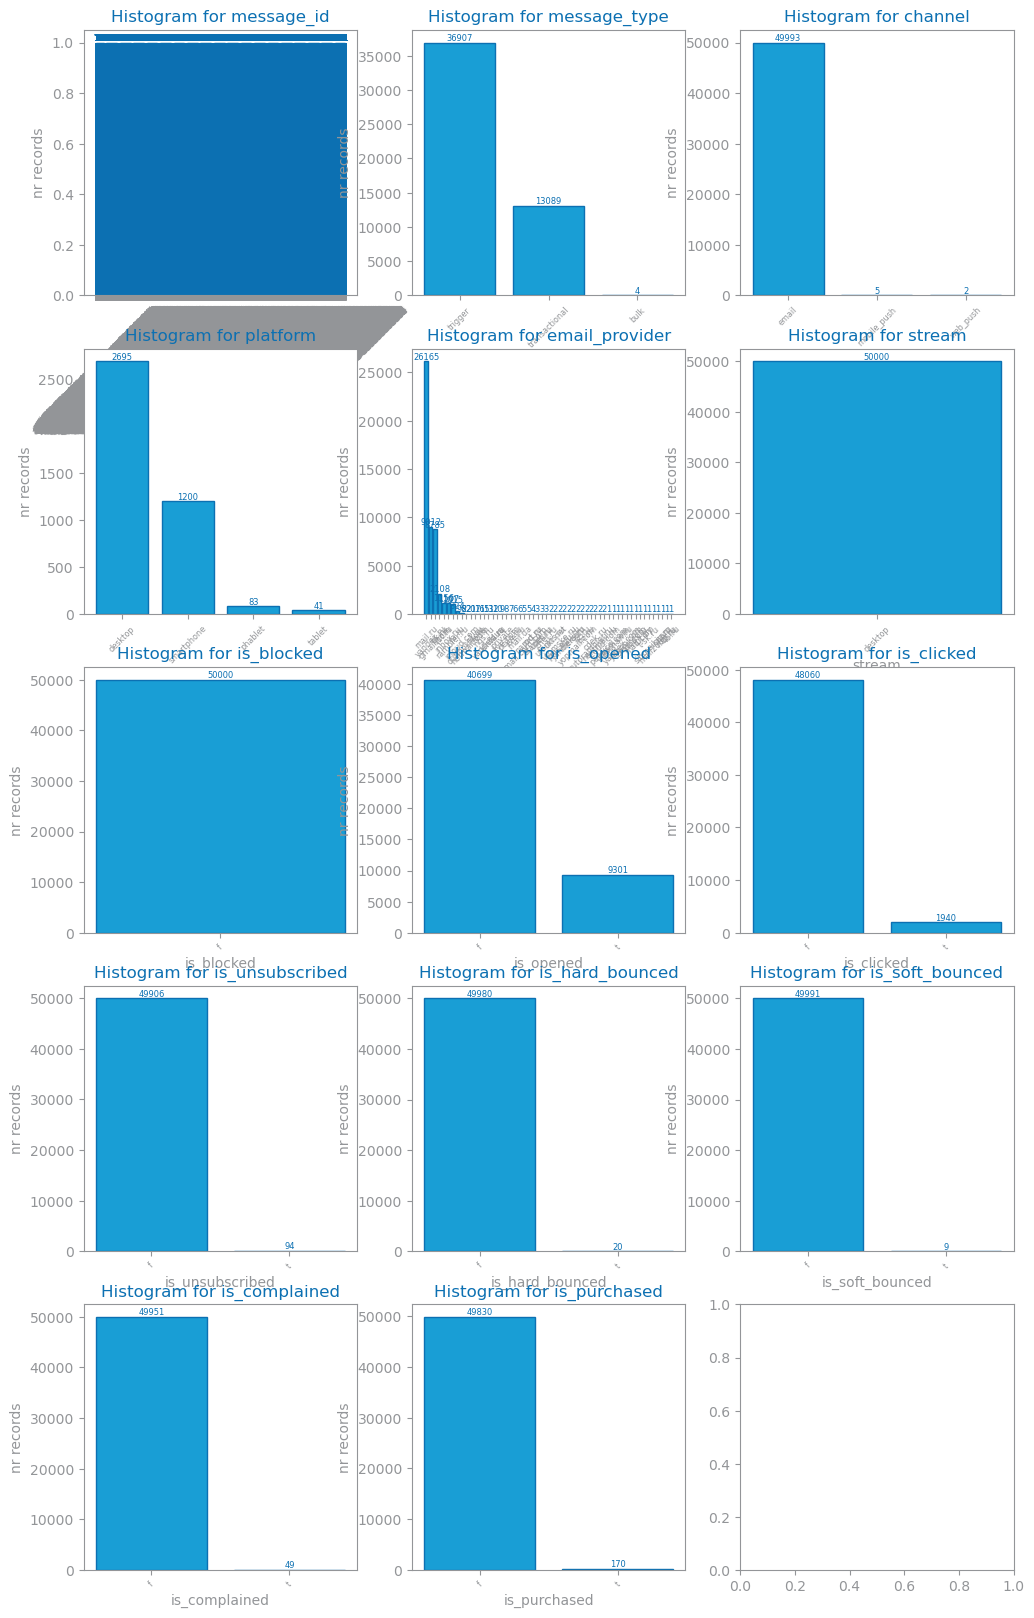

In [17]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT



symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

## Balancing and Class distribution


is_unsubscribed
f    49906
t       94
Name: count, dtype: int64


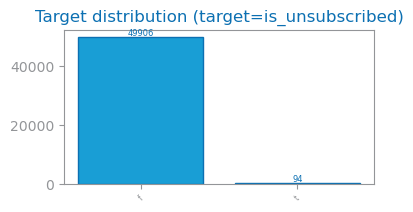

In [18]:
target = "is_unsubscribed"

values: Series = data[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"./{file_tag}_class_distribution.png")
show()

# Granularity

## Dates

In [19]:
from pandas import DataFrame
#ver para weekend, dia da semana (mon, tue, thu), hora, minuto. estudar a granularidade destas variaveis.
#variáveis ciclicas.

def derive_date_variables(data: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        data[date + "_year"] = data[date].dt.year
        data[date + "_quarter"] = data[date].dt.quarter
        data[date + "_month"] = data[date].dt.month
        data[date + "_day"] = data[date].dt.day
    return data

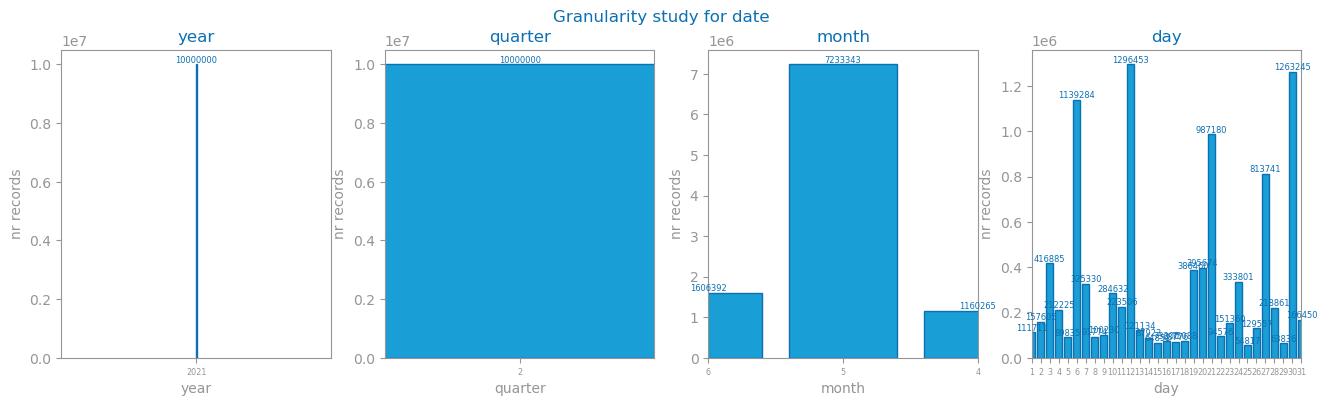

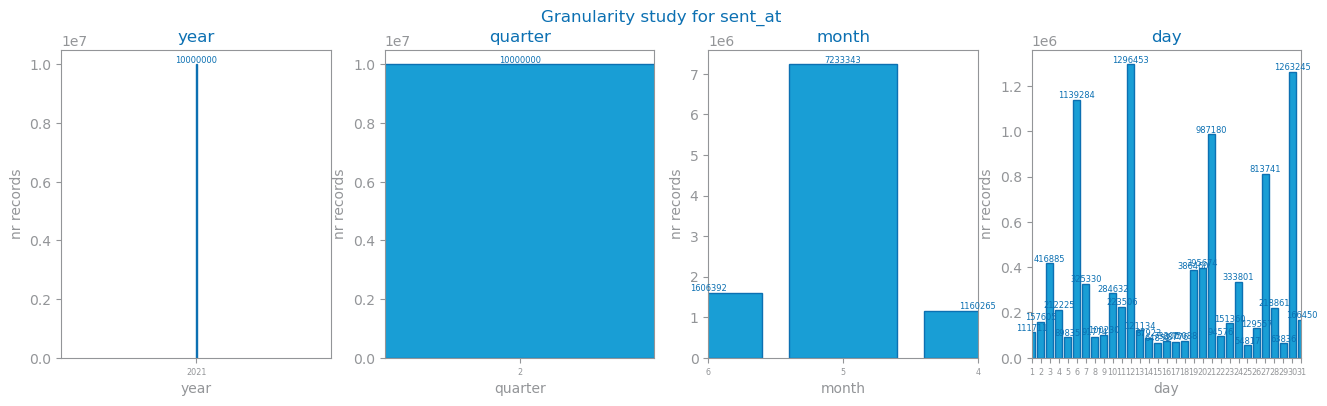

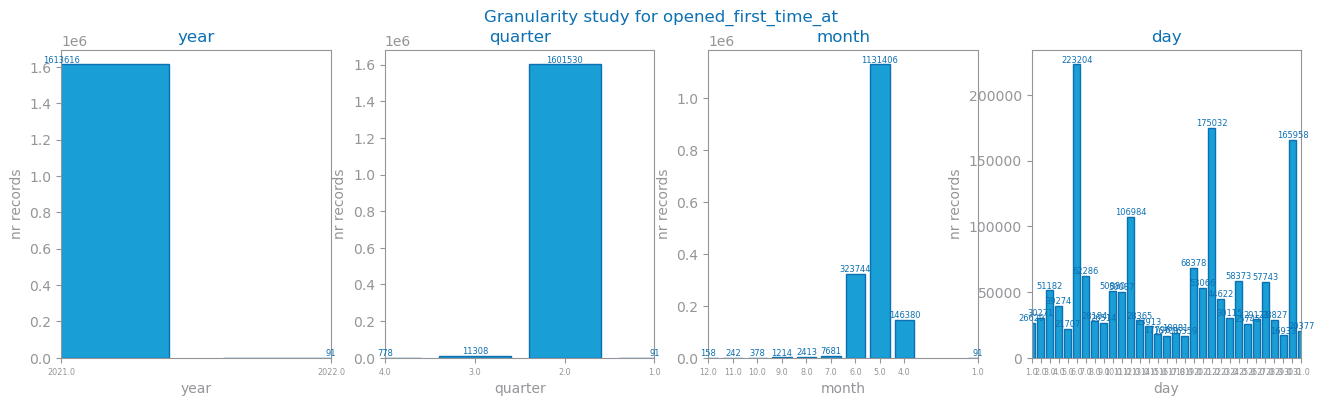

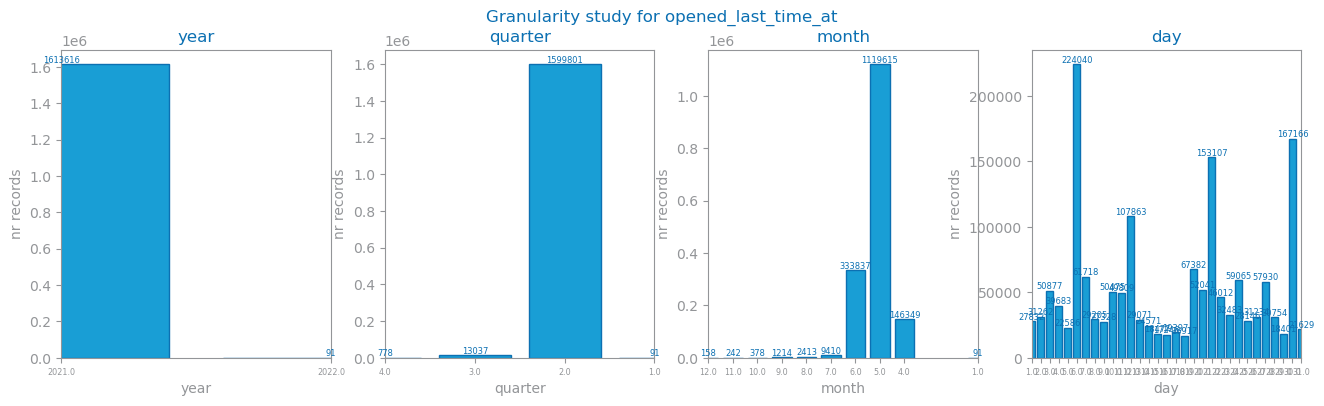

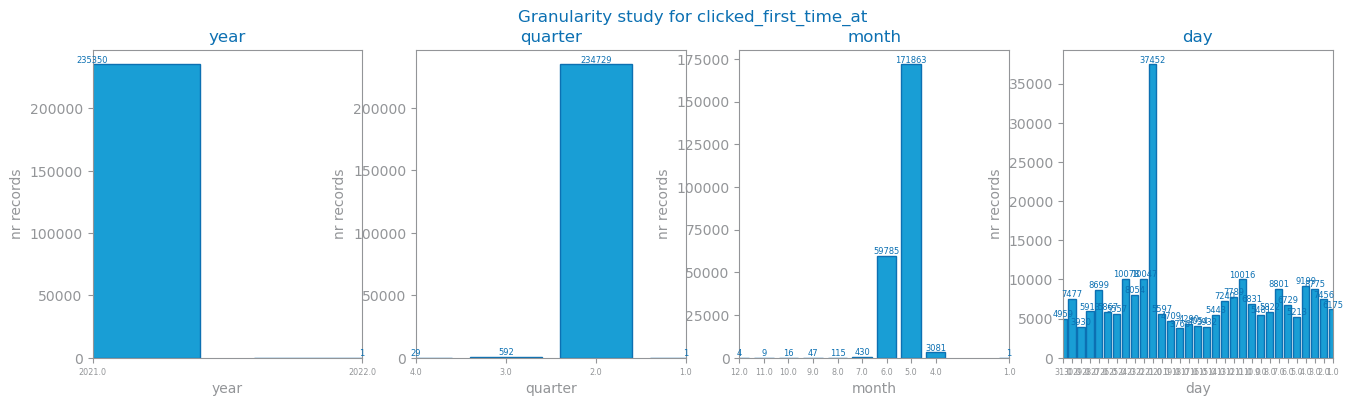

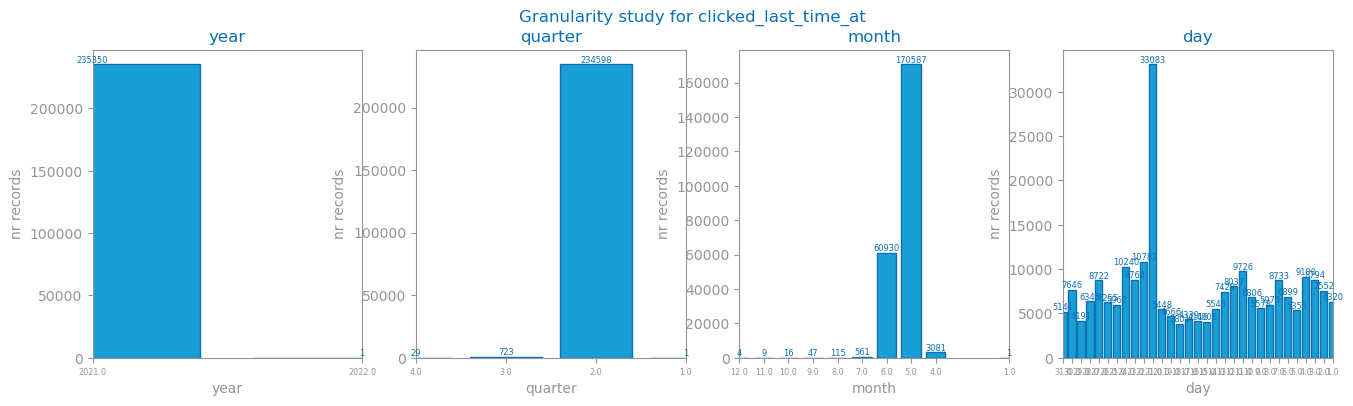

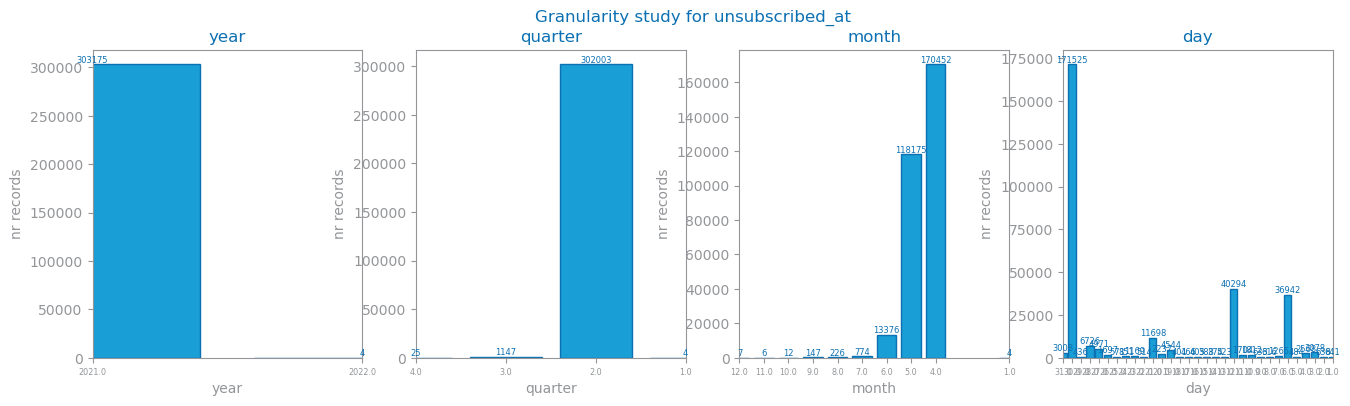

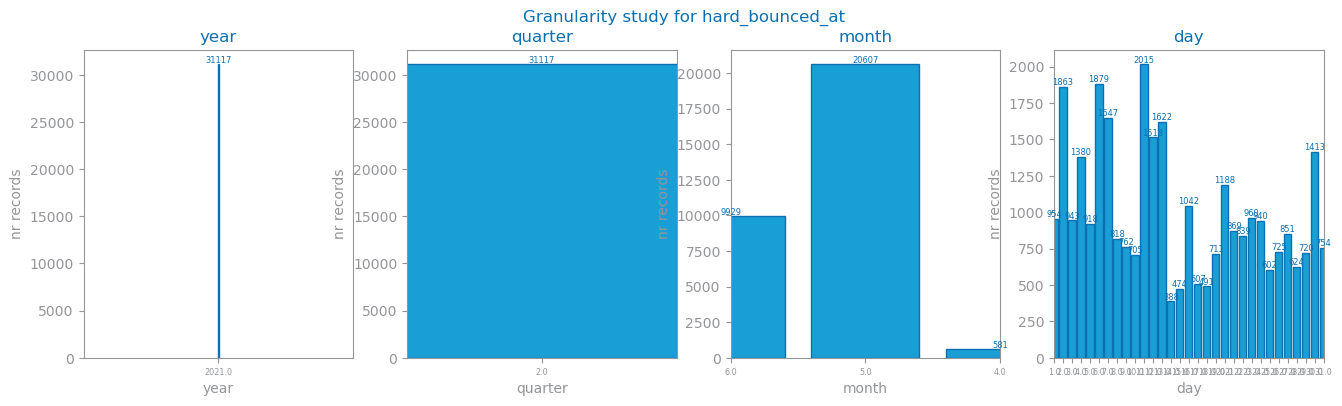

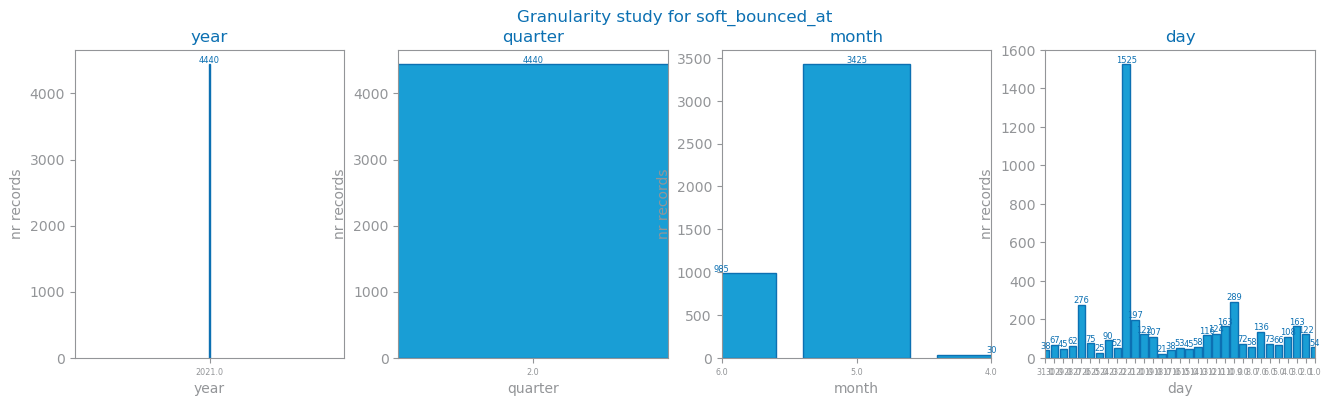

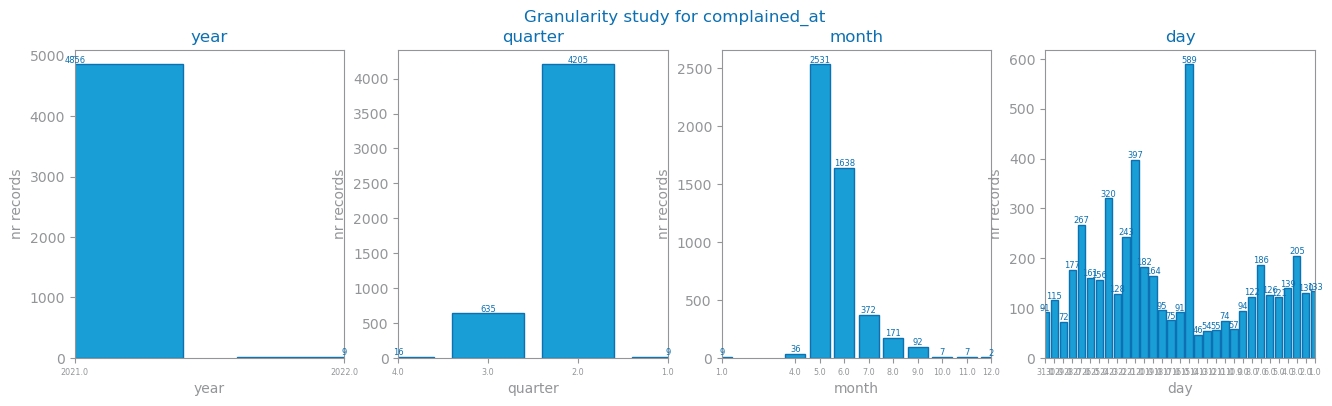

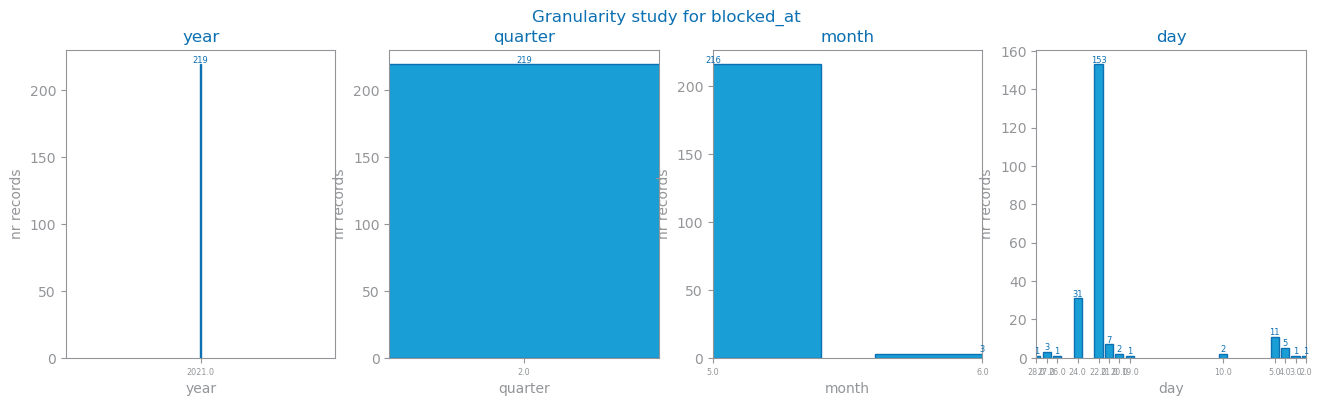

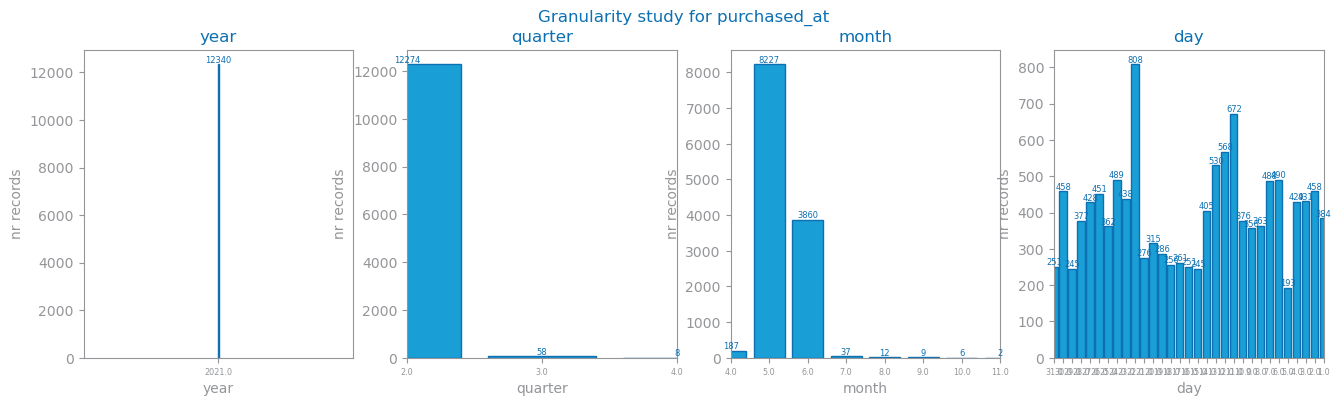

In [22]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
from dslabs_functions import get_variable_types, plot_bar_chart, HEIGHT


def analyse_date_granularity(data: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = data[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs


data: DataFrame = read_csv(
    filename, index_col=None, parse_dates=True, dayfirst=True
)
variables_types: dict[str, list] = get_variable_types(data)
data_ext: DataFrame = derive_date_variables(data, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(data, v_date, ["year", "quarter", "month", "day"])
    #savefig(f"./{file_tag}_granularity_{v_date}.png")
    show()

## Location